## Assignment 14. Decision Tree - 01

### import Libraries

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Loading Dataset

In [3]:
Company_data = pd.read_csv('Company_Data.csv')
Company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### EDA & Data Preprocessing

In [4]:
Company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
Company_data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
317,6.41,142,30,0,472,136,Good,80,15,No,No
361,8.68,131,25,10,183,104,Medium,56,15,No,Yes
33,8.77,114,38,13,317,128,Good,50,16,Yes,Yes
70,9.46,89,81,15,237,99,Good,74,12,Yes,Yes
54,4.90,134,103,13,25,144,Medium,76,17,No,Yes
295,4.21,118,35,14,502,137,Medium,79,10,No,Yes
340,7.50,140,29,0,105,91,Bad,43,16,Yes,No
228,5.40,149,73,13,381,163,Bad,26,11,No,Yes
73,12.61,118,90,10,54,104,Good,31,11,No,Yes
129,4.47,143,120,7,279,147,Bad,40,10,No,Yes


In [6]:
Company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
Company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


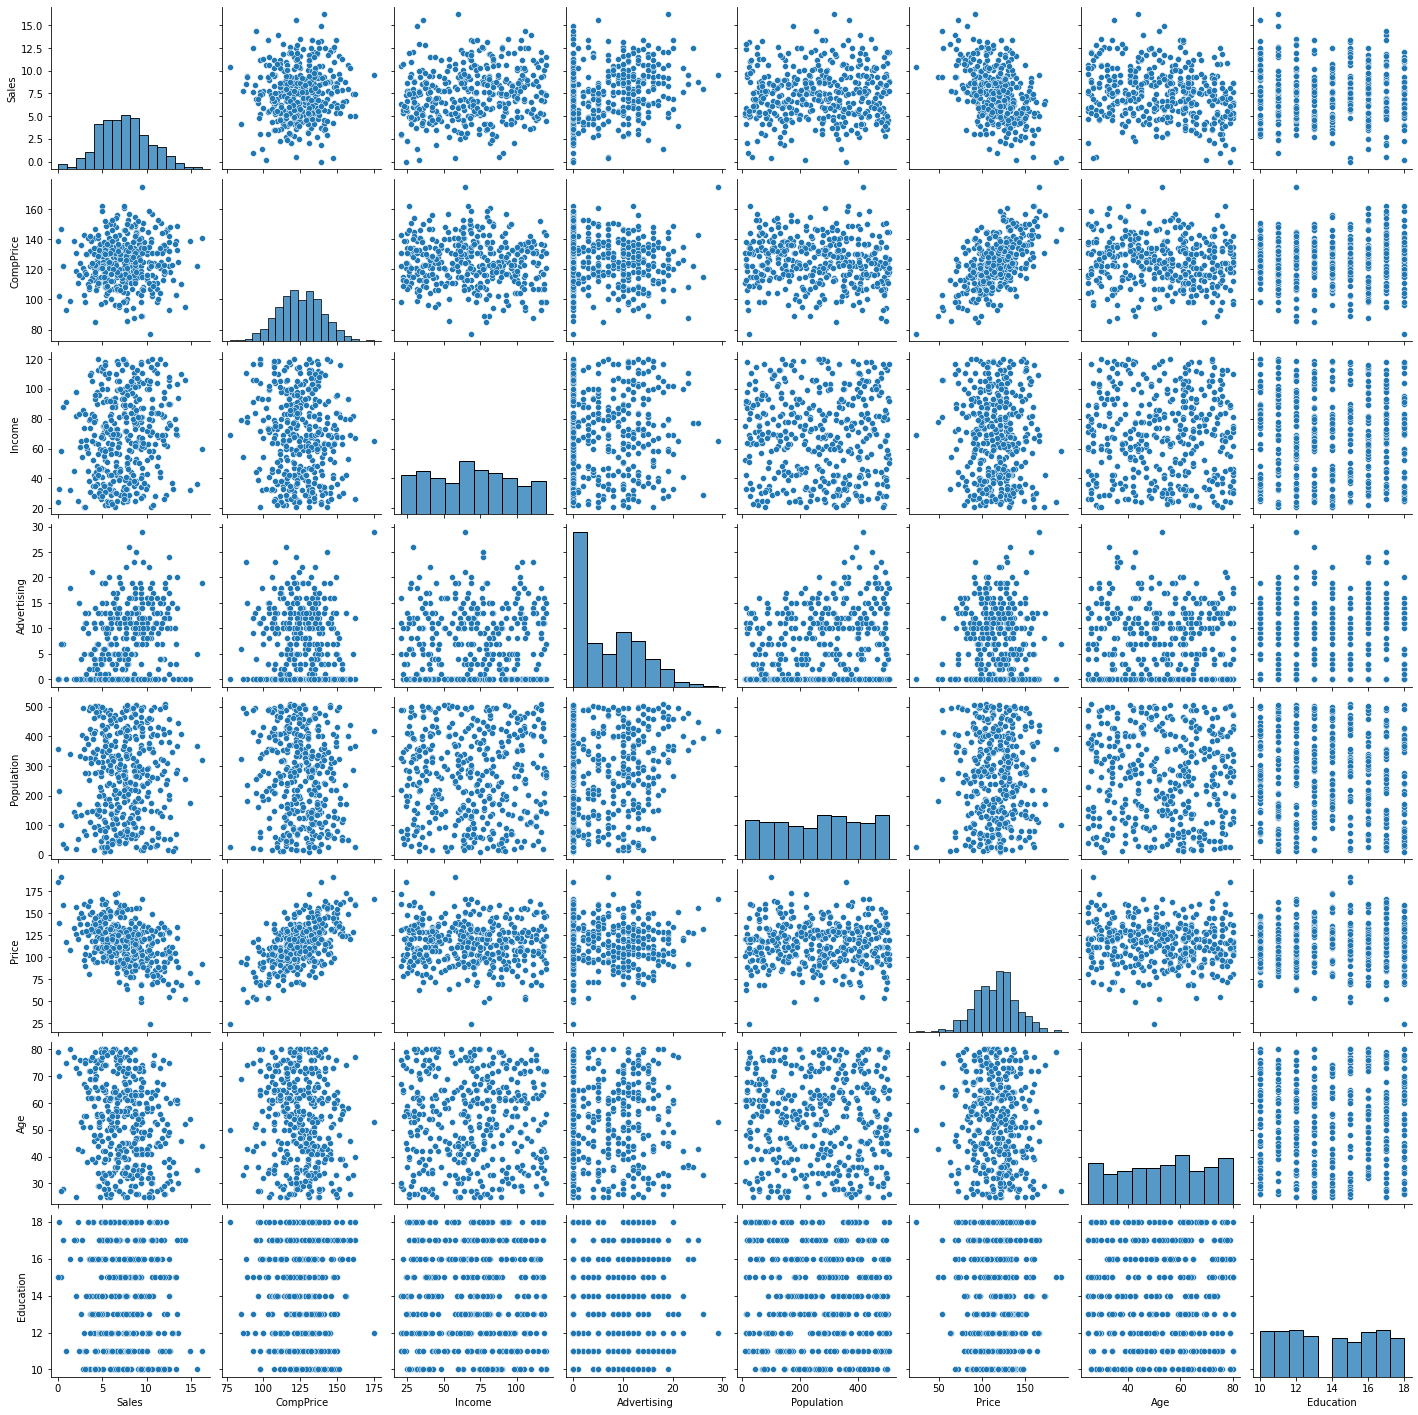

In [11]:
# pairplot
sns.pairplot(Company_data)

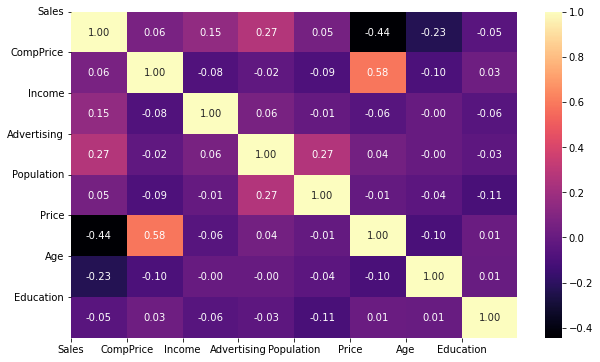

In [20]:
# Correlation analysis for data
corr = Company_data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


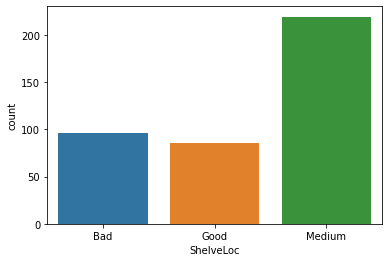

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


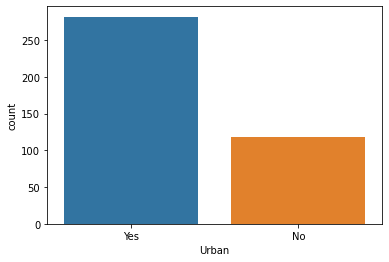

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


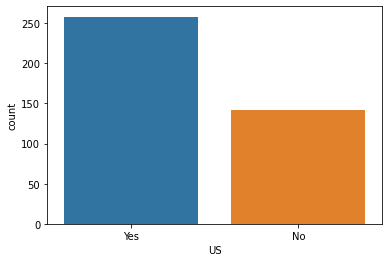

In [21]:
# checking count of categories for categorical columns colums
sns.countplot(Company_data['ShelveLoc'])
plt.show()

sns.countplot(Company_data['Urban'])
plt.show()

sns.countplot(Company_data['US'])
plt.show()

In [22]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
Company_data['Sales'] = pd.cut(x=Company_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
Company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

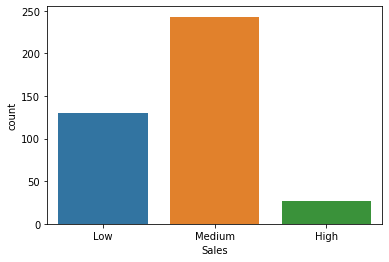

In [24]:
sns.countplot(Company_data['Sales'])

In [25]:
Company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [26]:
# Converting other attributes into categories
Company_data['CompPrice'] = pd.cut(x=Company_data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

Company_data['Income'] = pd.cut(x=Company_data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

Company_data['Advertising'] = pd.cut(x=Company_data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

Company_data['Population'] = pd.cut(x=Company_data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

Company_data['Price'] = pd.cut(x=Company_data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

Company_data['Age'] = pd.cut(x=Company_data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

Company_data['Education'] = pd.cut(x=Company_data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [28]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

Company_data['Sales'] = label_encoder.fit_transform(Company_data['Sales'])
Company_data['CompPrice'] = label_encoder.fit_transform(Company_data['CompPrice'])
Company_data['Income'] = label_encoder.fit_transform(Company_data['Income'])
Company_data['Advertising'] = label_encoder.fit_transform(Company_data['Advertising'])
Company_data['Population'] = label_encoder.fit_transform(Company_data['Population'])
Company_data['Price'] = label_encoder.fit_transform(Company_data['Price'])
Company_data['ShelveLoc'] = label_encoder.fit_transform(Company_data['ShelveLoc'])
Company_data['Age'] = label_encoder.fit_transform(Company_data['Age'])
Company_data['Education'] = label_encoder.fit_transform(Company_data['Education'])
Company_data['Urban'] = label_encoder.fit_transform(Company_data['Urban'])
Company_data['US'] = label_encoder.fit_transform(Company_data['US'])

Company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [29]:
# Dividing data into independent variables and dependent variable
X = Company_data.drop('Sales', axis = 1)
y = Company_data['Sales']

In [32]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [33]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [34]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [35]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,2,1,1,2,2,0,0,2,0,0
177,0,0,1,1,2,2,1,0,1,1
119,2,0,1,1,2,2,0,1,1,1
194,2,0,2,0,2,2,2,1,1,1
229,1,0,1,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,0,2,2,1,0,2,2,0,0,1
106,2,1,1,2,0,2,0,0,0,0
270,2,1,1,2,2,1,1,1,1,0
348,2,0,0,0,2,1,2,1,1,1


### Building model based on C5.0 Algorithm

In [36]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

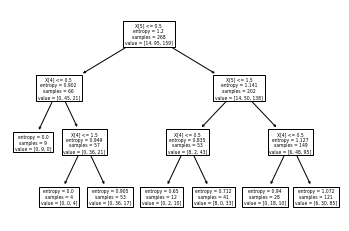

In [37]:
# Plotting Decision tree
tree.plot_tree(model_c5);

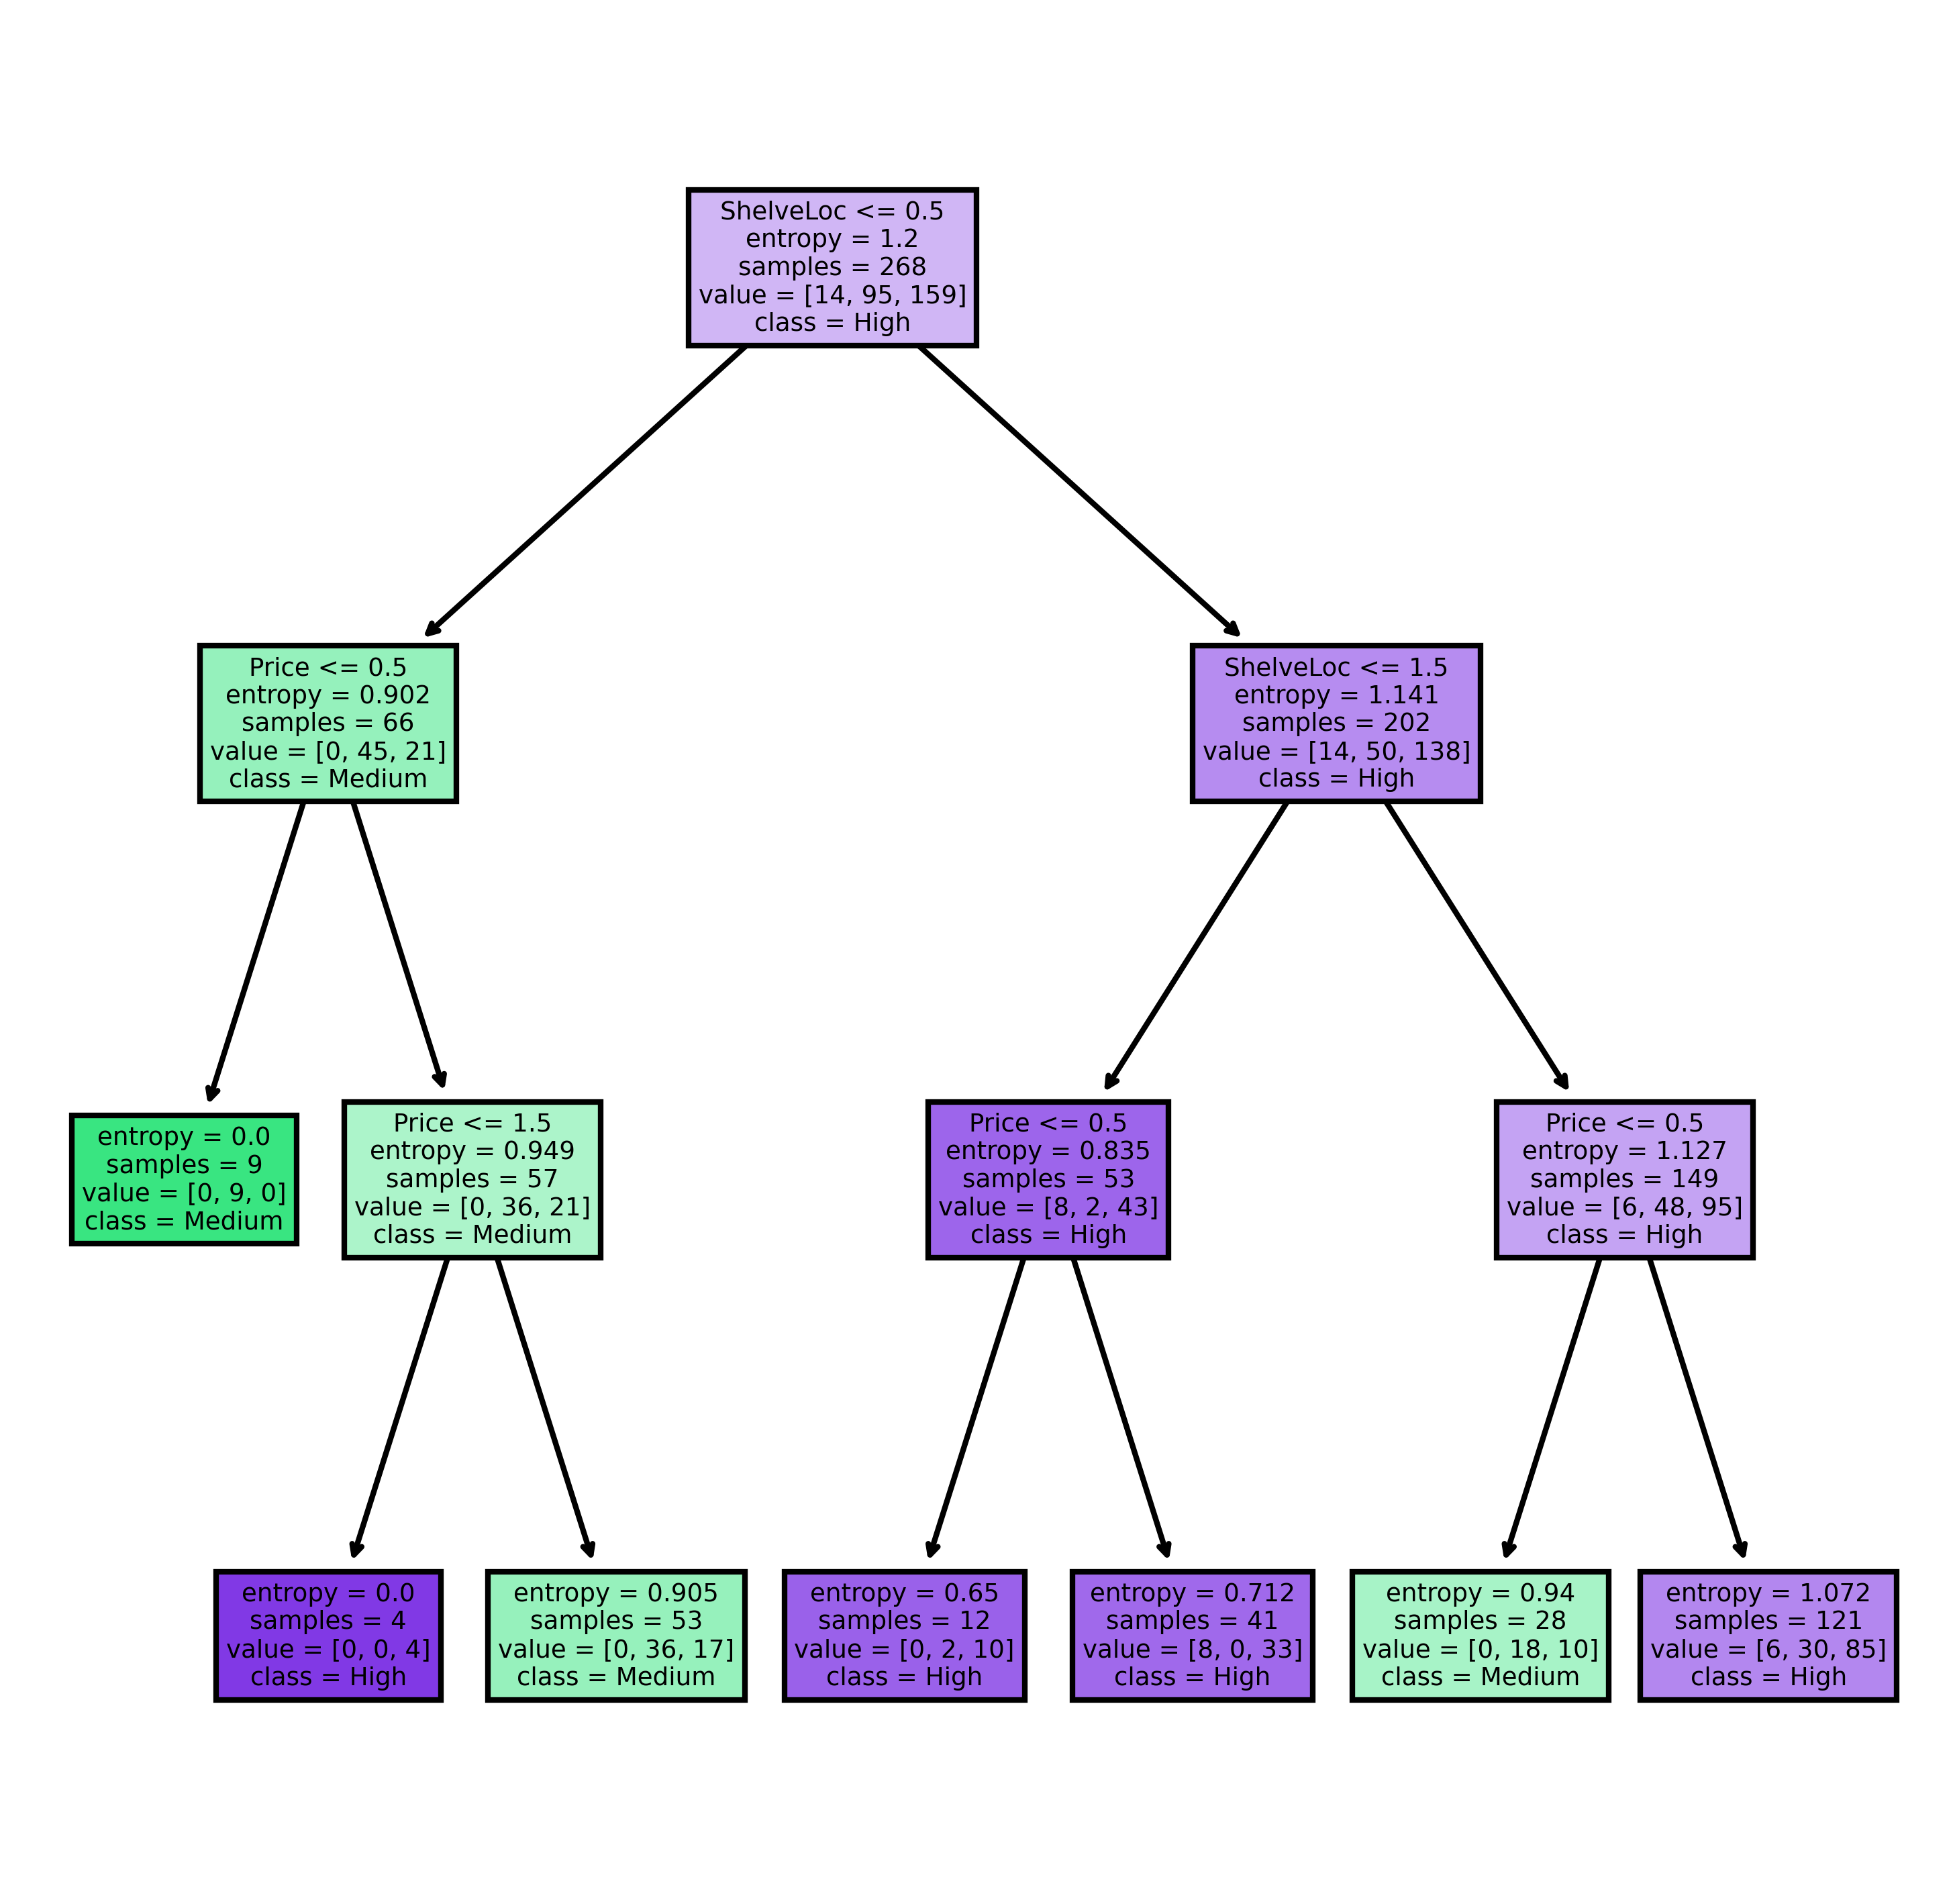

In [38]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [40]:
# Predicting Data
company_preds = model_c5.predict(x_test)
pd.Series(company_preds).value_counts()

2    94
1    38
dtype: int64

In [41]:
company_preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [42]:
# Creating cross tables for checking model
pd.crosstab(y_test, company_preds)

col_0,1,2
Sales,,
0,0,13
1,22,13
2,16,68


In [43]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6818181818181818

### Building model based on CART Algorithm

In [44]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

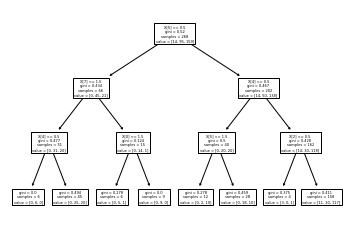

In [45]:
# Plotting Decision tree
tree.plot_tree(model_CART);

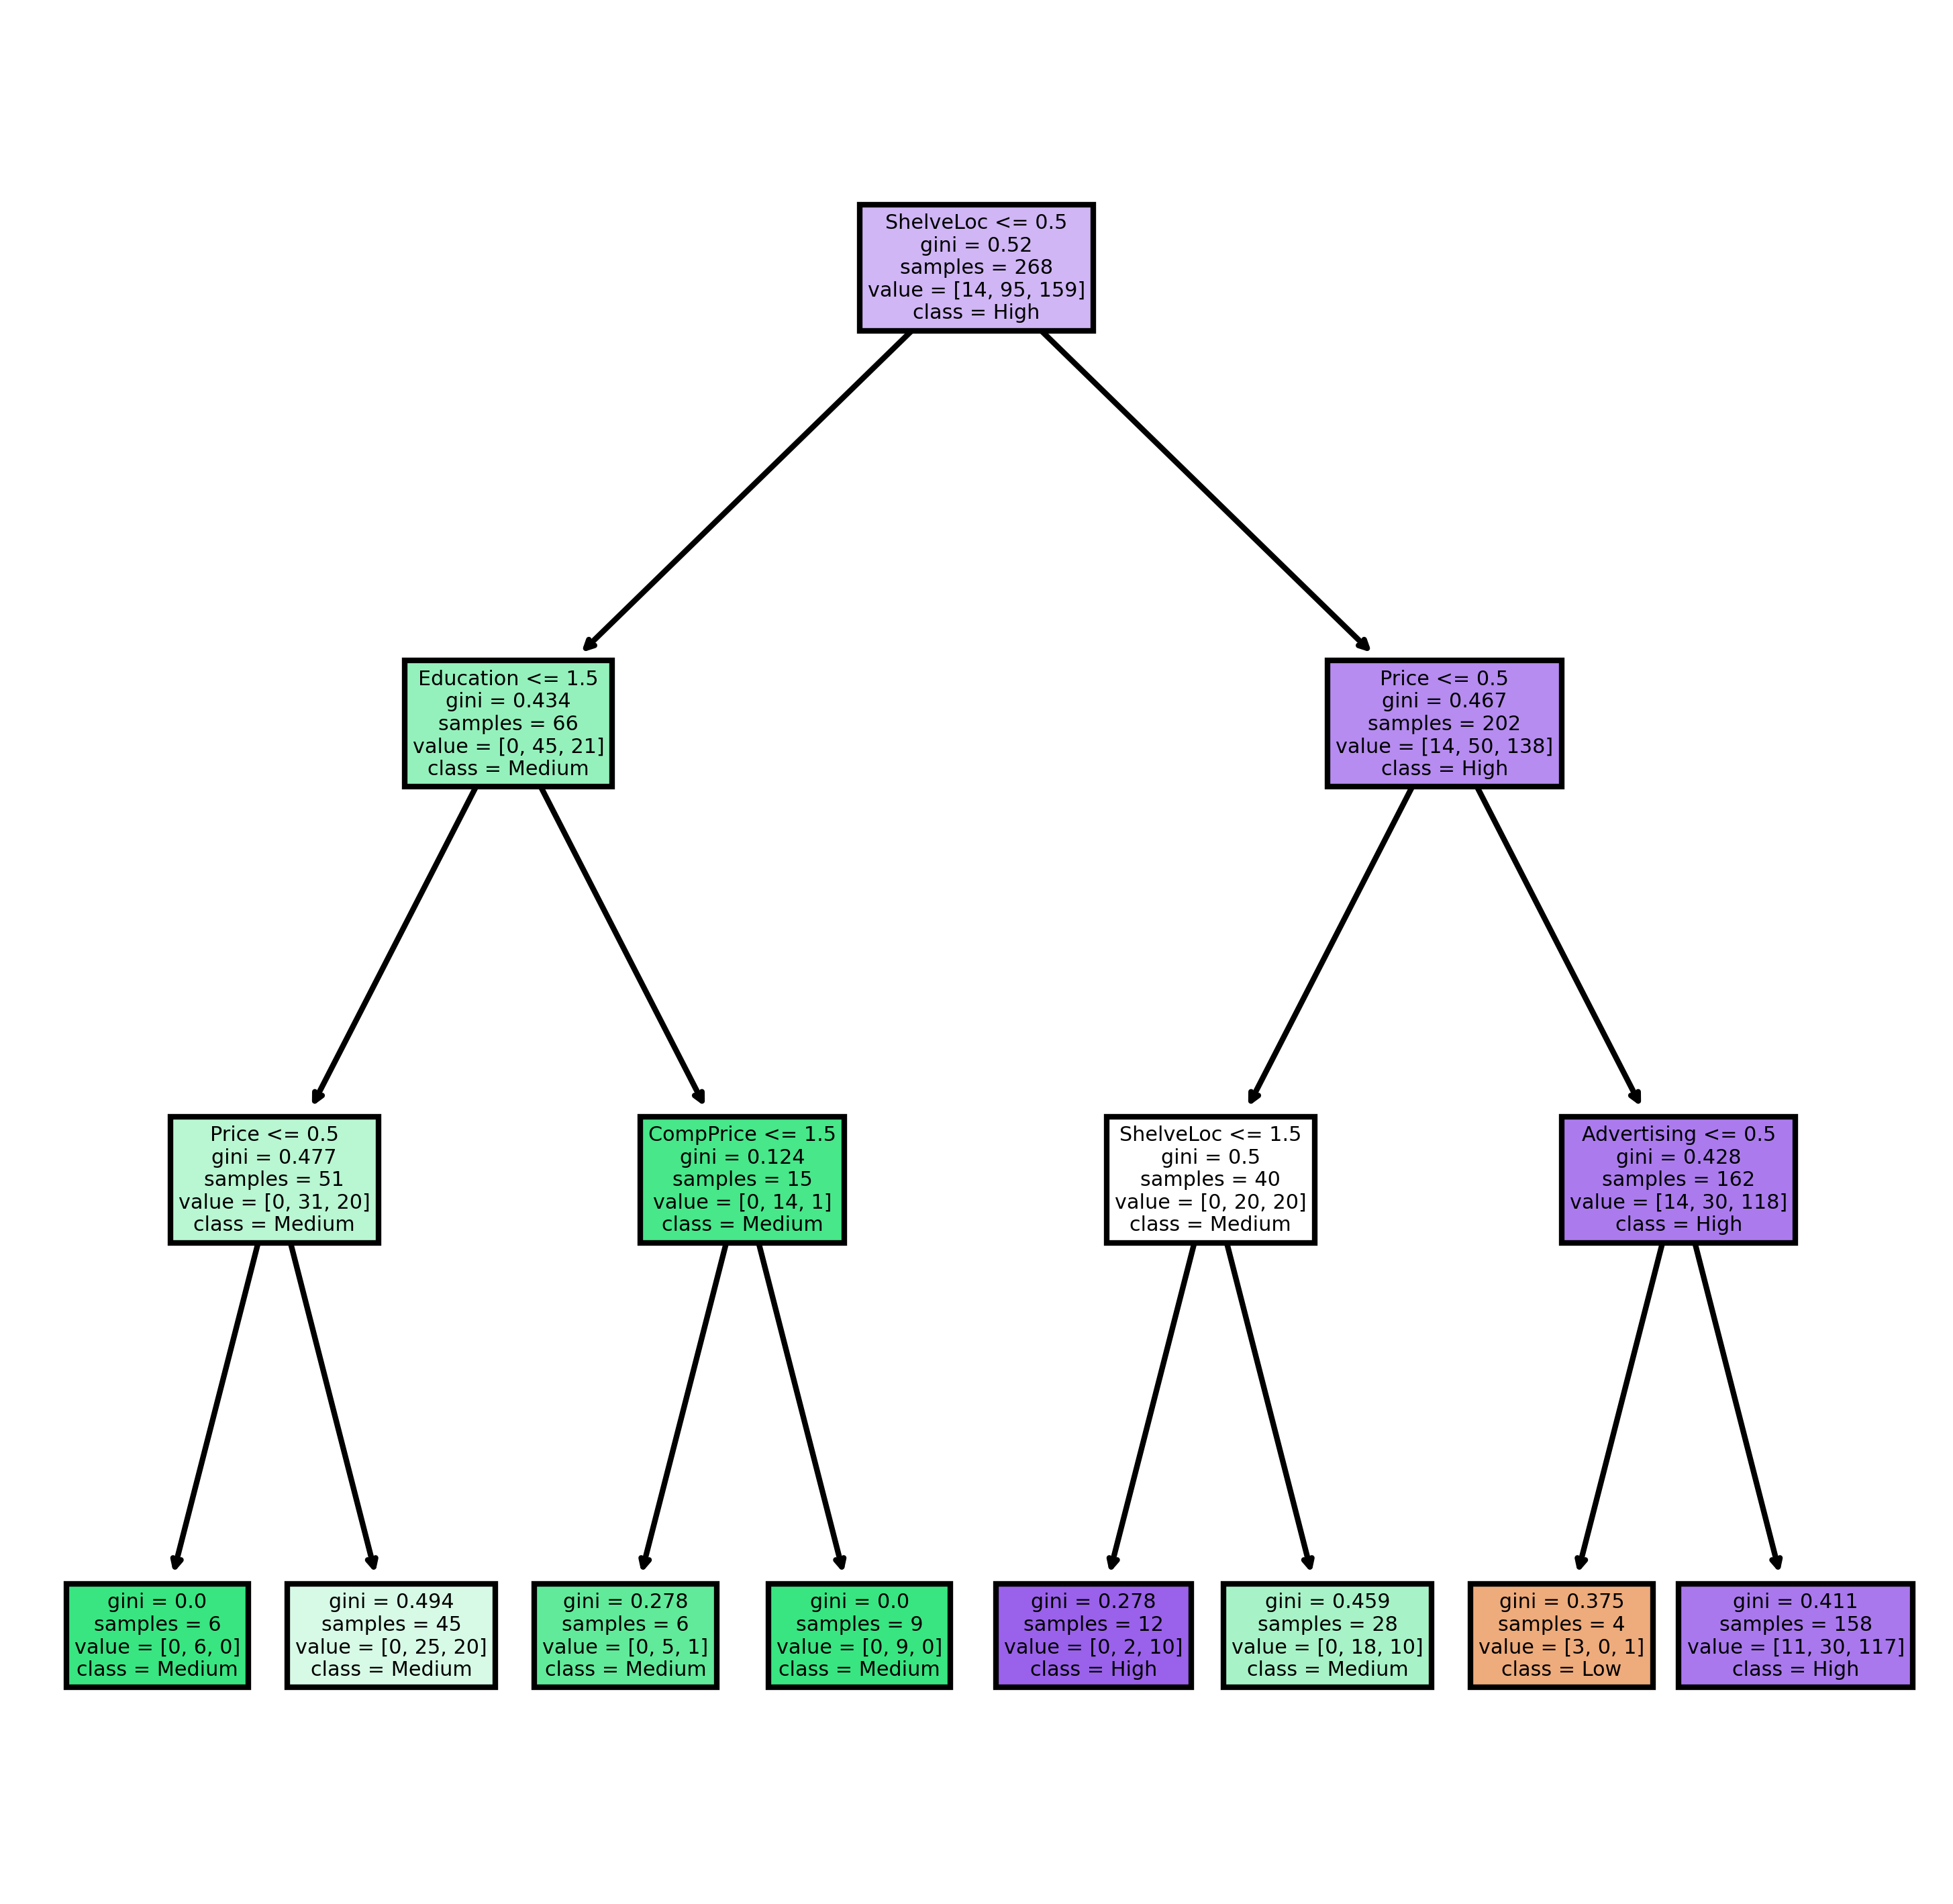

In [48]:
fn1=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn1=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn1, 
               class_names=cn,
               filled = True);

In [47]:
# Predicting Data
company_preds1 = model_CART.predict(x_test)
pd.Series(company_preds1).value_counts()

2    89
1    40
0     3
dtype: int64

In [49]:
company_preds1

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2])

In [50]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,1,2
Sales,,
0,0,13
1,22,13
2,16,68


In [51]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.6515151515151515

### ==========================================================================================